**Imports**


In [3]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import warnings




Data Collection and Analysis

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

path = "/content/drive/MyDrive/final_satelite_data.csv"
df = pd.read_csv(path)

In [7]:
path1 = "/content/drive/MyDrive/Copy of openaq_predicted_2023_2025.csv"
df1 = pd.read_csv(path1)

In [8]:
df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'pm25', 'no2', 'o3', 'pm10',
       'co', 'so2', 'aqi_pm25', 'aqi_pm10', 'aqi_no2', 'aqi_o3', 'aqi_co',
       'aqi_so2', 'temperature_celsius', 'wind_speed_10m',
       'wind_direction_10m', 'u_wind_10m', 'v_wind_10m',
       'relative_humidity_2m', 'surface_pressure', 'pressure_hpa',
       'precipitation', 'cloud_cover', 'dew_point_2m', 'wind_gusts_10m',
       'et0_fao_evapotranspiration', 'vapor_pressure_deficit', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos',
       'wind_dir_sin', 'wind_dir_cos', 'AQI', 'AQI_Category_Encoded'],
      dtype='object')

In [9]:
df.shape

(3433820, 39)

In [10]:
df.describe()

,Unnamed: 0,latitude,longitude,pm25,no2,o3,pm10,co,so2,aqi_pm25,...,hour_sin,hour_cos,dow_sin,dow_cos,month_sin,month_cos,wind_dir_sin,wind_dir_cos,AQI,AQI_Category_Encoded
count,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,...,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06,3.433820e+06
mean,1.716910e+06,2.585319e-16,2.487992e-16,-8.727263e-17,-1.260752e-16,5.067176e-16,5.683398e-16,1.070381e-16,-1.082631e-16,9.657597e-17,...,5.005926e-17,3.880255e-17,8.621318e-17,1.443508e-17,1.168049e-16,1.085114e-16,1.307351e-17,-8.929894e-17,2.144077e+01,9.394086e-02
std,9.912586e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.673628e+01,3.009398e-01
min,0.000000e+00,-2.298832e+00,-3.035670e+00,-4.006318e-01,-5.861341e+00,-4.213994e+00,-1.098214e+00,-1.717134e+00,-8.339139e-01,-4.259418e-01,...,-1.414407e+00,-1.414407e+00,-1.376208e+00,-1.276702e+00,-1.367456e+00,-1.253038e+00,-7.469801e-01,-1.293941e+00,4.533811e-01,0.000000e+00
25%,8.584548e+05,-4.911320e-01,-9.408803e-01,-4.006318e-01,-6.592574e-01,-7.115140e-01,-6.623713e-01,-4.201195e-01,-8.339139e-01,-4.259418e-01,...,-2.727740e-17,-3.870846e-04,-1.103154e+00,-1.276702e+00,-1.177345e+00,-1.060876e+00,-6.190474e-01,-2.516411e-01,8.907676e+00,0.000000e+00
50%,1.716910e+06,1.446805e-01,-5.003568e-02,-4.006318e-01,1.097226e-02,-1.714389e-01,-3.442797e-01,-1.899114e-01,-8.339139e-01,-4.259418e-01,...,-2.727740e-17,-3.870846e-04,2.417524e-03,-3.171350e-01,5.155229e-02,-5.358772e-01,-6.048588e-01,-2.447255e-01,1.546293e+01,0.000000e+00
75%,2.575364e+06,5.737218e-01,8.959077e-01,-1.143860e-01,6.577925e-01,6.234706e-01,4.115377e-01,9.270031e-02,9.509393e-01,-1.146504e-01,...,1.459375e-16,1.413633e+00,1.107989e+00,8.794257e-01,7.610563e-01,8.984450e-01,1.368399e+00,3.363329e-01,3.041071e+01,0.000000e+00
max,3.433819e+06,2.800027e+00,2.213491e+00,2.426850e+01,5.860012e+00,3.780383e+00,1.085053e+01,1.007197e+01,1.438447e+01,1.454717e+01,...,1.414407e+00,1.413633e+00,1.381043e+00,1.411945e+00,1.470560e+00,1.615606e+00,1.973340e+00,3.054753e+00,1.572599e+02,3.000000e+00


In [11]:
df1.shape

(3433820, 9)

In [12]:

df['time'] = df1['time']

In [13]:
print (df1.shape, df.shape)
print (df1.columns )
print (df.columns)


(3433820, 9) (3433820, 40)
Index(['time', 'latitude', 'longitude', 'pm25', 'no2', 'o3', 'pm10', 'co',
       'so2'],
      dtype='object')
Index(['Unnamed: 0', 'latitude', 'longitude', 'pm25', 'no2', 'o3', 'pm10',
       'co', 'so2', 'aqi_pm25', 'aqi_pm10', 'aqi_no2', 'aqi_o3', 'aqi_co',
       'aqi_so2', 'temperature_celsius', 'wind_speed_10m',
       'wind_direction_10m', 'u_wind_10m', 'v_wind_10m',
       'relative_humidity_2m', 'surface_pressure', 'pressure_hpa',
       'precipitation', 'cloud_cover', 'dew_point_2m', 'wind_gusts_10m',
       'et0_fao_evapotranspiration', 'vapor_pressure_deficit', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos',
       'wind_dir_sin', 'wind_dir_cos', 'AQI', 'AQI_Category_Encoded', 'time'],
      dtype='object')


Data Preprocessing


* Convert the 'time' column to a proper datetime type.
* The format looks ISO-like, but using errors='coerce' is a safe way to handle any bad entries.
* Set the 'time' column as the DataFrame's index.
* Sort the index chronologically.
* Apply the time-based slice to get the last 12 months of data.
* Slice last 12 months








In [14]:


df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.set_index('time', drop=True)
df = df.sort_index(ascending=True)
end_date = df.index.max()
start_date = end_date - pd.DateOffset(months=12)
df1 = df.loc[start_date:end_date]


print(f"Original Index Range: {df.index.min()} to {df.index.max()}")
print(f"Original Data Rows: {len(df)}")
print(f"Last 12 Months Data Rows: {len(df1)}")
print(f"Index Range of df1: {df1.index.min()} to {df1.index.max()}")

Original Index Range: 2023-04-01 00:00:00+00:00 to 2025-09-30 00:00:00+00:00
Original Data Rows: 3433820
Last 12 Months Data Rows: 1373340
Index Range of df1: 2024-09-30 00:00:00+00:00 to 2025-09-30 00:00:00+00:00


In [15]:
print(df1.shape)
print (df1.columns)

(1373340, 39)
Index(['Unnamed: 0', 'latitude', 'longitude', 'pm25', 'no2', 'o3', 'pm10',
       'co', 'so2', 'aqi_pm25', 'aqi_pm10', 'aqi_no2', 'aqi_o3', 'aqi_co',
       'aqi_so2', 'temperature_celsius', 'wind_speed_10m',
       'wind_direction_10m', 'u_wind_10m', 'v_wind_10m',
       'relative_humidity_2m', 'surface_pressure', 'pressure_hpa',
       'precipitation', 'cloud_cover', 'dew_point_2m', 'wind_gusts_10m',
       'et0_fao_evapotranspiration', 'vapor_pressure_deficit', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos',
       'wind_dir_sin', 'wind_dir_cos', 'AQI', 'AQI_Category_Encoded'],
      dtype='object')


*  multi-level sort
* Sort by 'latitude' and 'longitude' first (to group stations).
* Sort by the 'time' index second (to order the sequence within each station).
* df1.index.name refers to 'time'

In [16]:

df1 = df1.sort_values(by=['latitude', 'longitude', df1.index.name], ascending=True)
print("DataFrame df1 sorted by station (Lat/Lon) and time.")
print(df1.head())

DataFrame df1 sorted by station (Lat/Lon) and time.
                           Unnamed: 0  latitude  longitude      pm25  \
time                                                                   
2024-09-30 00:00:00+00:00     2449702 -2.298832   0.207857  0.342522   
2024-09-30 12:00:00+00:00     2880758 -2.298832   0.207857 -0.400632   
2024-09-30 18:00:00+00:00     2252443 -2.298832   0.207857 -0.400632   
2024-10-01 00:00:00+00:00     2756558 -2.298832   0.207857 -0.400632   
2024-10-01 00:00:00+00:00     2690804 -2.298832   0.207857 -0.400632   

                                no2        o3      pm10        co       so2  \
time                                                                          
2024-09-30 00:00:00+00:00 -0.016156 -0.161295 -0.162024 -0.323725  0.518323   
2024-09-30 12:00:00+00:00 -0.362686  0.280415  2.552886 -0.288898 -0.833914   
2024-09-30 18:00:00+00:00 -0.697897 -0.470266  4.854182  2.867200  1.149674   
2024-10-01 00:00:00+00:00 -2.369985 -0.682571  0

In [17]:

drop_cols = ["Unnamed: 0", "aqi_pm25", "AQI", "AQI_Category_Encoded"]
df_clean = df1.drop(columns=[c for c in drop_cols if c in df1.columns])


In [18]:
# Add lagged, rolling, and interaction features
# Lag features (previous hours)
for pollutant in ["pm25", "pm10", "no2", "so2", "co", "o3"]:
    df_clean[f"{pollutant}_lag1"] = df_clean[pollutant].shift(1)
    df_clean[f"{pollutant}_lag3"] = df_clean[pollutant].shift(3)
    df_clean[f"{pollutant}_lag6"] = df_clean[pollutant].shift(6)

# Rolling mean features (24h window)
for pollutant in ["pm25", "pm10", "no2", "so2", "co", "o3"]:
    df_clean[f"{pollutant}_mean_24h"] = (
        df_clean[pollutant].rolling(window=24, min_periods=1).mean()
    )

# Pollutant interaction ratios
df_clean["pm25_pm10_ratio"] = df_clean["pm25"] / (df_clean["pm10"] + 1e-6)
df_clean["o3_no2_ratio"] = df_clean["o3"] / (df_clean["no2"] + 1e-6)

# Final engineered DataFrame
df_features = df_clean.drop(columns=[c for c in drop_cols if c in df_clean.columns])


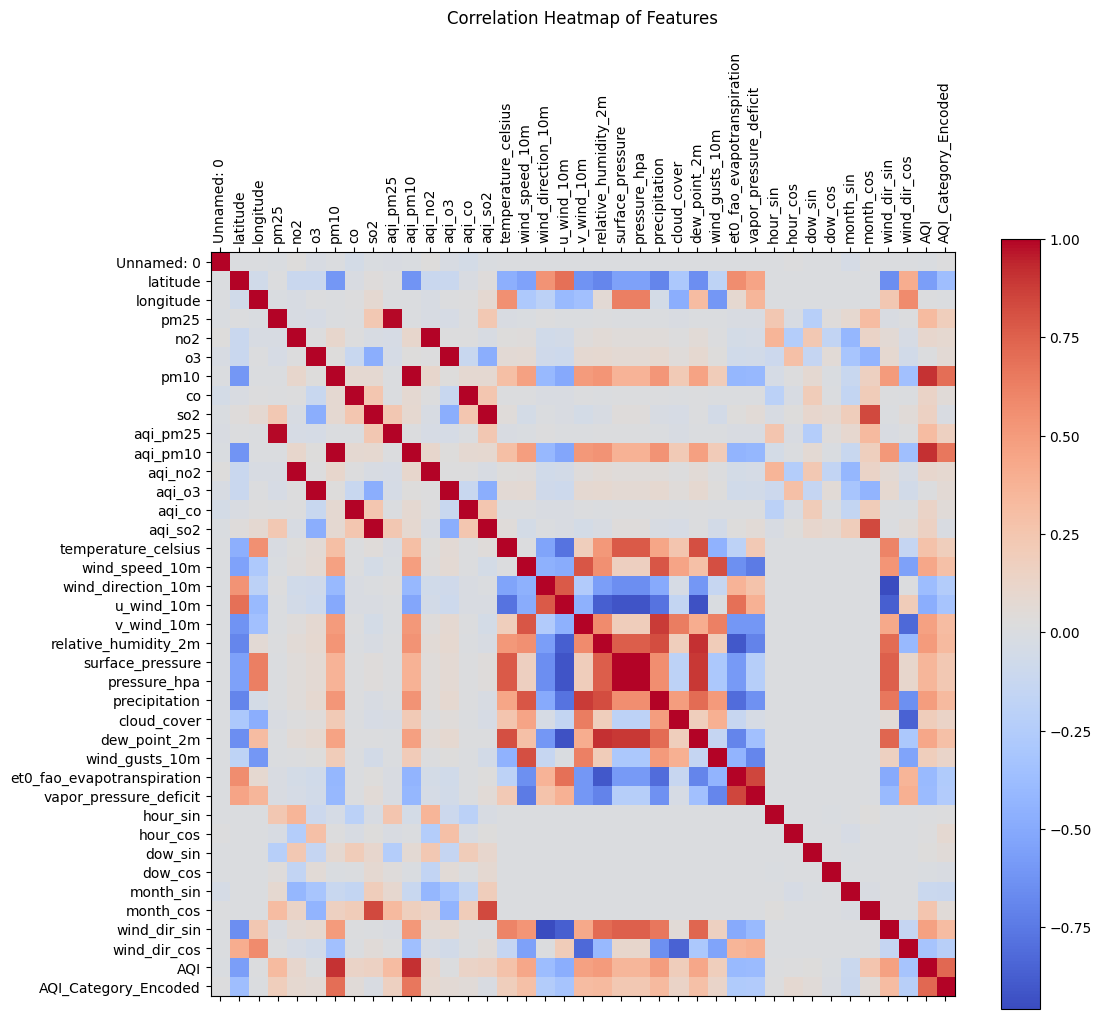

In [19]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr, cmap="coolwarm")
plt.colorbar(cax)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title("Correlation Heatmap of Features", pad=20)
plt.show()


In [20]:
df1 = df1.drop(columns=[
    'Unnamed: 0',
    'AQI_Category_Encoded',
    'aqi_pm25',
    'aqi_pm10',
    'aqi_no2',
    'aqi_o3',
    'aqi_co',
    'aqi_so2',
    'surface_pressure',
    'u_wind_10m',
    'v_wind_10m',
    'hour_cos',
    'dow_cos',
    'month_cos',
    'wind_dir_cos'
])

In [21]:
def create_time_features(df):
    df = df.copy()
    dt = df.index
    df["hour_sin"] = np.sin(2 * np.pi * dt.hour / 24)
    df["hour_cos"] = np.cos(2 * np.pi * dt.hour / 24)
    df["dow_sin"] = np.sin(2 * np.pi * dt.dayofweek / 7)
    df["dow_cos"] = np.cos(2 * np.pi * dt.dayofweek / 7)
    df["month_sin"] = np.sin(2 * np.pi * (dt.month-1) / 12)
    df["month_cos"] = np.cos(2 * np.pi * (dt.month-1) / 12)
    return df

def create_time_features_single(ts):
    """Create time features for a single timestamp"""
    return {
        "hour_sin": np.sin(2 * np.pi * ts.hour / 24),
        "hour_cos": np.cos(2 * np.pi * ts.hour / 24),
        "dow_sin": np.sin(2 * np.pi * ts.dayofweek / 7),
        "dow_cos": np.cos(2 * np.pi * ts.dayofweek / 7),
        "month_sin": np.sin(2 * np.pi * (ts.month-1) / 12),
        "month_cos": np.cos(2 * np.pi * (ts.month-1) / 12)
    }

def add_lag_features(df, lags=[1,3,6,24]):
    df = df.copy()
    for col in ["pm25","pm10","no2","so2","co","o3","AQI"]:
        if col in df.columns:
            for lag in lags:
                df[f"{col}_lag{lag}"] = df[col].shift(lag)
    return df

def add_rolling_features(df, windows=[24]):
    df = df.copy()
    for col in ["pm25","pm10","no2","so2","co","o3","AQI"]:
        if col in df.columns:
            for win in windows:
                df[f"{col}_roll{win}h"] = df[col].rolling(window=win, min_periods=1).mean()
    return df
# Parameters
HORIZON_HOURS = 24 * 30   # 1 month
RANDOM_STATE = 42

df = df1.copy()

# DROP: Leakage and redundant features
drop_cols = [
    "Unnamed: 0",                    # Index column
    "aqi_pm25",                      # DATA LEAKAGE - derived from AQI
    "AQI_Category_Encoded",          # DATA LEAKAGE - categorical target
    "wind_dir_sin",                  # Redundant with wind_direction_10m
    "wind_dir_cos"                   # Redundant with wind_direction_10m
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print(f"Features after dropping: {len(df.columns)}")
print(f"Remaining columns: {sorted(df.columns.tolist())}\n")

target = "AQI"

# Feature engineering on historical data
print("Creating features...")
df = create_time_features(df)
df = add_lag_features(df)
df = add_rolling_features(df)

print(f"Before dropna: {len(df)} rows")
df = df.dropna()
print(f"After dropna: {len(df)} rows")

feature_cols = [c for c in df.columns if c not in [target]]
print(f"\nTotal features for training: {len(feature_cols)}\n")



Features after dropping: 23
Remaining columns: ['AQI', 'cloud_cover', 'co', 'dew_point_2m', 'dow_sin', 'et0_fao_evapotranspiration', 'hour_sin', 'latitude', 'longitude', 'month_sin', 'no2', 'o3', 'pm10', 'pm25', 'precipitation', 'pressure_hpa', 'relative_humidity_2m', 'so2', 'temperature_celsius', 'vapor_pressure_deficit', 'wind_direction_10m', 'wind_gusts_10m', 'wind_speed_10m']

Creating features...
Before dropna: 1373340 rows
After dropna: 1373316 rows

Total features for training: 60



In [22]:
warnings.filterwarnings('ignore')

# AQI FORECASTING WITH OCTOBER PREDICTION
print("\n" + "="*70)
print("AQI FORECASTING WITH FUTURE PREDICTION")
print("Strategy: Train on most data, test on last 30 days, predict October")
print("="*70)

# Sort by datetime to ensure proper time series split
df1 = df1.sort_index()

# Remove timezone if present
if df1.index.tz is not None:
    df1.index = df1.index.tz_localize(None)

print(f"\nData Period: {df1.index.min()} to {df1.index.max()}")
print(f"Total records: {len(df1)}")

weather_features = ['cloud_cover', 'dew_point_2m', 'et0_fao_evapotranspiration',
                   'precipitation', 'pressure_hpa', 'relative_humidity_2m',
                   'temperature_celsius', 'vapor_pressure_deficit',
                   'wind_direction_10m', 'wind_gusts_10m', 'wind_speed_10m']

pollutant_features = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

temporal_features = ['hour_sin', 'dow_sin', 'month_sin']

base_features = temporal_features + weather_features + pollutant_features
target_col = 'AQI'




AQI FORECASTING WITH FUTURE PREDICTION
Strategy: Train on most data, test on last 30 days, predict October

Data Period: 2024-09-30 00:00:00 to 2025-09-30 00:00:00
Total records: 1373340


In [23]:


# TRAIN-TEST SPLIT
# Split data: Use most of data for training, leave last month for testing
# Then predict one month into the future (October)

# Get the date range
start_date = df1.index.min()
end_date = df1.index.max()
total_days = (end_date - start_date).days

print(f"\nTotal days in dataset: {total_days}")

# Strategy: Use last 30 days as test set, rest as training
test_start_date = end_date - pd.Timedelta(days=30)

train_df = df1[df1.index < test_start_date]
test_df = df1[df1.index >= test_start_date]

print(f"\nTraining set: {len(train_df)} rows ({train_df.index.min()} to {train_df.index.max()})")
print(f"Test set: {len(test_df)} rows ({test_df.index.min()} to {test_df.index.max()})")

# Prepare training data
X_train = train_df[base_features]
y_train = train_df[target_col]

X_test = test_df[base_features]
y_test = test_df[target_col]


# TRAIN AQI PREDICTION MODEL

print("\n" + "="*70)
print("TRAINING AQI PREDICTION MODEL")
print("="*70)



Total days in dataset: 365

Training set: 1259600 rows (2024-09-30 00:00:00 to 2025-08-30 18:00:00)
Test set: 113740 rows (2025-08-31 00:00:00 to 2025-09-30 00:00:00)

TRAINING AQI PREDICTION MODEL


In [24]:

aqi_model = XGBRegressor(
    n_estimators=200,        # Reduced from 500
    learning_rate=0.1,       # Increased from 0.05 (faster, less overfitting)
    max_depth=4,             # Reduced from 8 (simpler trees)
    min_child_weight=5,      # Increased from 3 (more regularization)
    subsample=0.7,           # Reduced from 0.8 (more randomness)
    colsample_bytree=0.7,    # Reduced from 0.8 (more randomness)
    gamma=0.3,               # Increased from 0.1 (more pruning)
    reg_alpha=0.5,           # Increased from 0.1 (more L1 regularization)
    reg_lambda=2,            # Increased from 1 (more L2 regularization)
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=30  # Reduced from 50
)

aqi_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=50
)



[0]	validation_0-rmse:15.90517	validation_1-rmse:16.43745
[50]	validation_0-rmse:1.99754	validation_1-rmse:2.18715
[100]	validation_0-rmse:1.43826	validation_1-rmse:1.64882
[150]	validation_0-rmse:1.28856	validation_1-rmse:1.50392
[199]	validation_0-rmse:1.18152	validation_1-rmse:1.39290


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [25]:

# EVALUATE ON TEST SET
print("\n" + "="*70)
print("MODEL PERFORMANCE ON TEST SET")
print("="*70)

y_train_pred = aqi_model.predict(X_train)
y_test_pred = aqi_model.predict(X_test)

def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    mask = y_true > 0.1
    if mask.sum() > 0:
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        mape = 0

    print(f"\n{name}:")
    print(f"  MAE:   {mae:.4f}")
    print(f"  RMSE:  {rmse:.4f}")
    print(f"  R²:    {r2:.4f}")
    print(f"  MAPE:  {mape:.2f}%")

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

train_metrics = evaluate_model(y_train, y_train_pred, "Training Set")
test_metrics = evaluate_model(y_test, y_test_pred, "Test Set (Last 30 Days)")



MODEL PERFORMANCE ON TEST SET

Training Set:
  MAE:   0.4267
  RMSE:  1.1815
  R²:    0.9950
  MAPE:  2.97%

Test Set (Last 30 Days):
  MAE:   0.4660
  RMSE:  1.3929
  R²:    0.9934
  MAPE:  3.14%


In [26]:

# GENERATE OCTOBER PREDICTIONS

print("\n" + "="*70)
print("GENERATING OCTOBER PREDICTIONS")
print("Combining recent trends + historical patterns")
print("="*70)

# Create October dates (hourly)
october_start = end_date + pd.Timedelta(hours=1)
october_end = october_start + pd.Timedelta(days=31) - pd.Timedelta(hours=1)

print(f"\nOctober forecast period: {october_start} to {october_end}")

october_dates = pd.date_range(start=october_start, end=october_end, freq='H')

print("\nStep 1: Computing historical patterns by hour and day-of-week...")


GENERATING OCTOBER PREDICTIONS
Combining recent trends + historical patterns

October forecast period: 2025-09-30 01:00:00 to 2025-10-31 00:00:00

Step 1: Computing historical patterns by hour and day-of-week...


  Computed statistics for 28 hour-dow combinations

Step 2: Computing recent trends (last 30 days)...
  Trend adjustments computed (recent vs historical means)

Step 3: Computing moving averages for smoothing...

Step 4: Generating October features...

Step 5: Applying trend adjustments and recent patterns...
  October features generated: 744 rows
  Using: 60% historical patterns + 30% recent trends + 10% last week patterns

October Forecast Summary:
  Total predictions: 744
  Mean predicted AQI: 81.82
  Min predicted AQI: 14.17
  Max predicted AQI: 96.24
  Std predicted AQI: 30.19

October forecast saved to: 'october_forecast_final.csv'


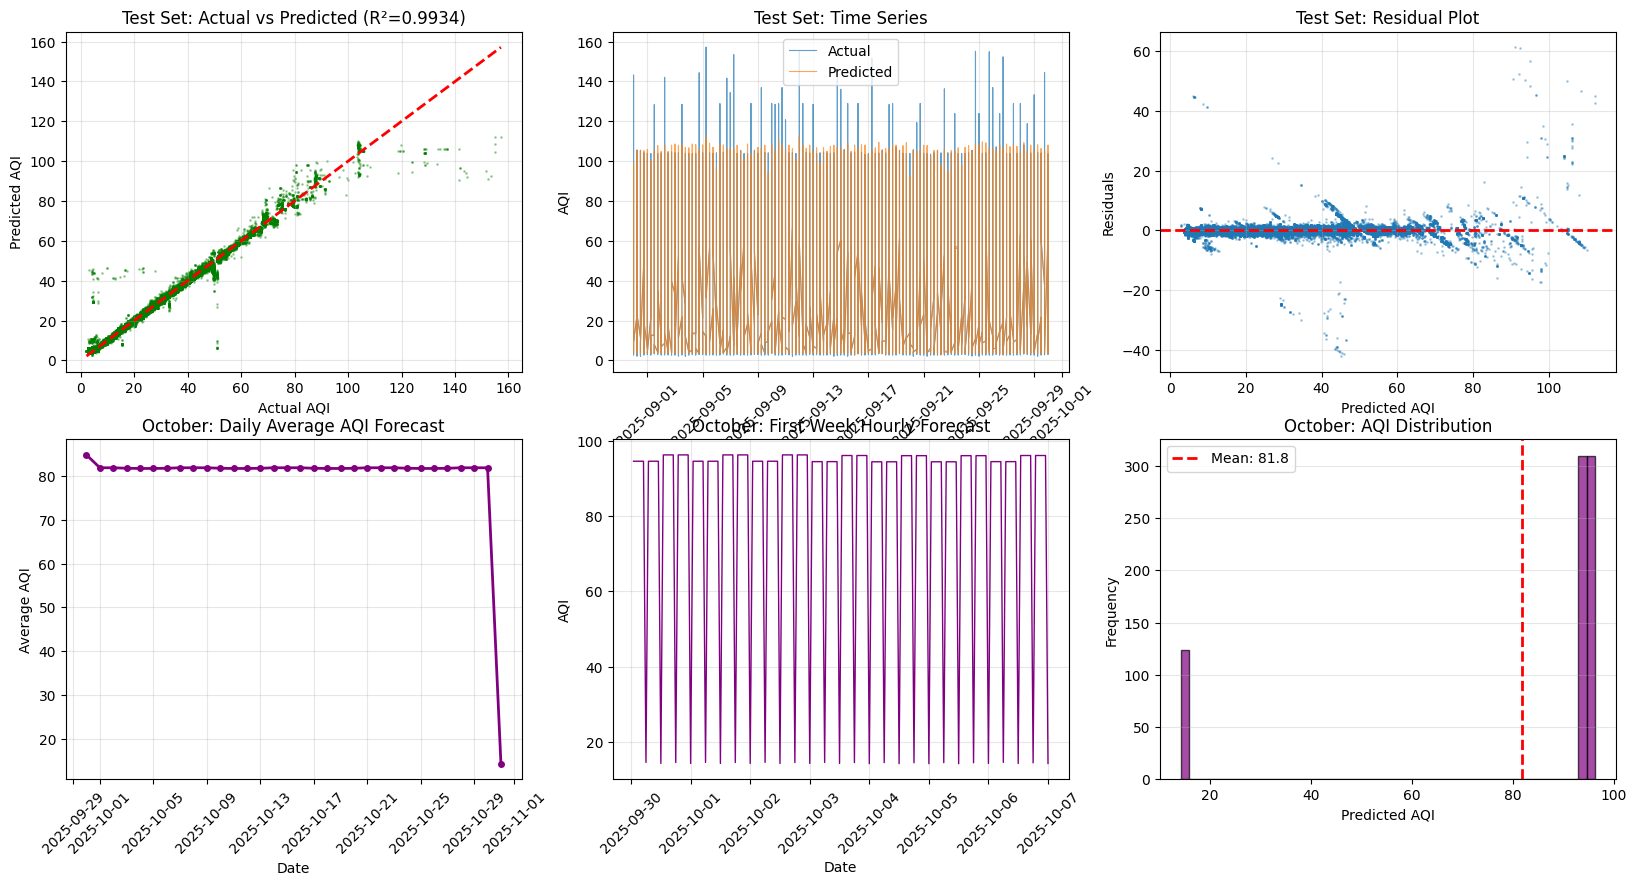

In [27]:

# Pre-compute historical statistics
df1_copy = df1.copy()
df1_copy['hour'] = df1_copy.index.hour
df1_copy['dow'] = df1_copy.index.dayofweek

historical_stats = df1_copy.groupby(['hour', 'dow'])[weather_features + pollutant_features].median()
print(f"  Computed statistics for {len(historical_stats)} hour-dow combinations")

print("\nStep 2: Computing recent trends (last 30 days)...")
# Get recent data trends
recent_data = df1[df1.index >= (end_date - pd.Timedelta(days=30))]
recent_means = recent_data[weather_features + pollutant_features].mean()
historical_means = df1[weather_features + pollutant_features].mean()

# Calculate trend adjustment (how much recent data differs from historical average)
trend_adjustment = recent_means - historical_means
print(f"  Trend adjustments computed (recent vs historical means)")

print("\nStep 3: Computing moving averages for smoothing...")
# Get last 7 days for short-term patterns
last_week = df1[df1.index >= (end_date - pd.Timedelta(days=7))]
last_week_by_hour = last_week.groupby(last_week.index.hour)[weather_features + pollutant_features].mean()

print("\nStep 4: Generating October features...")
# Create October dataframe with temporal features
october_df = pd.DataFrame(index=october_dates)
october_df['hour_sin'] = np.sin(2 * np.pi * october_df.index.hour / 24)
october_df['dow_sin'] = np.sin(2 * np.pi * october_df.index.dayofweek / 7)
october_df['month_sin'] = np.sin(2 * np.pi * october_df.index.month / 12)
october_df['hour'] = october_df.index.hour
october_df['dow'] = october_df.index.dayofweek

# Merge with historical patterns
october_df = october_df.merge(historical_stats, left_on=['hour', 'dow'],
                               right_index=True, how='left')

print("\nStep 5: Applying trend adjustments and recent patterns...")
# Apply weighted combination of:
# 1. Historical pattern (60% weight)
# 2. Recent trend adjustment (30% weight)
# 3. Last week's hourly pattern (10% weight)

for feat in weather_features + pollutant_features:
    if feat in october_df.columns:
        # Start with historical pattern
        base_values = october_df[feat].values

        # Add trend adjustment (30% weight)
        adjusted_values = base_values + (0.3 * trend_adjustment[feat])

        # Blend with last week's hourly pattern (10% weight)
        for hour in range(24):
            hour_mask = october_df['hour'] == hour
            if hour in last_week_by_hour.index:
                last_week_value = last_week_by_hour.loc[hour, feat]
                # Weighted average: 90% adjusted + 10% last week
                adjusted_values[hour_mask] = (0.9 * adjusted_values[hour_mask] +
                                             0.1 * last_week_value)

        october_df[feat] = adjusted_values

# Drop helper columns
october_df = october_df.drop(['hour', 'dow'], axis=1)

# Ensure correct column order
october_df = october_df[base_features]

print(f"  October features generated: {len(october_df)} rows")
print(f"  Using: 60% historical patterns + 30% recent trends + 10% last week patterns")

# Make October predictions
october_aqi_predictions = aqi_model.predict(october_df)

# Create October forecast dataframe
october_forecast = pd.DataFrame({
    'datetime': october_dates,
    'predicted_aqi': october_aqi_predictions
})

# Add features used for prediction
for col in base_features:
    october_forecast[f'feature_{col}'] = october_df[col].values

print(f"\nOctober Forecast Summary:")
print(f"  Total predictions: {len(october_aqi_predictions)}")
print(f"  Mean predicted AQI: {october_aqi_predictions.mean():.2f}")
print(f"  Min predicted AQI: {october_aqi_predictions.min():.2f}")
print(f"  Max predicted AQI: {october_aqi_predictions.max():.2f}")
print(f"  Std predicted AQI: {october_aqi_predictions.std():.2f}")

# Save predictions
october_forecast.to_csv('october_forecast_final.csv', index=False)
print(f"\nOctober forecast saved to: 'october_forecast_final.csv'")


# VISUALIZATIONS

fig = plt.figure(figsize=(20, 15))

# Row 1: Test Set Performance
ax1 = plt.subplot(3, 3, 1)
ax1.scatter(y_test, y_test_pred, alpha=0.3, s=1, c='green')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual AQI')
ax1.set_ylabel('Predicted AQI')
ax1.set_title(f'Test Set: Actual vs Predicted (R²={test_metrics["R2"]:.4f})')
ax1.grid(True, alpha=0.3)

ax2 = plt.subplot(3, 3, 2)
ax2.plot(test_df.index, y_test.values, label='Actual', alpha=0.7, linewidth=0.8)
ax2.plot(test_df.index, y_test_pred, label='Predicted', alpha=0.7, linewidth=0.8)
ax2.set_xlabel('Date')
ax2.set_ylabel('AQI')
ax2.set_title('Test Set: Time Series')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

ax3 = plt.subplot(3, 3, 3)
residuals = y_test - y_test_pred
ax3.scatter(y_test_pred, residuals, alpha=0.3, s=1)
ax3.axhline(y=0, color='r', linestyle='--', lw=2)
ax3.set_xlabel('Predicted AQI')
ax3.set_ylabel('Residuals')
ax3.set_title('Test Set: Residual Plot')
ax3.grid(True, alpha=0.3)

# Row 2: October Forecast
ax4 = plt.subplot(3, 3, 4)
october_forecast['date'] = october_forecast['datetime'].dt.date
daily_avg = october_forecast.groupby('date')['predicted_aqi'].mean()
ax4.plot(daily_avg.index, daily_avg.values, marker='o', linewidth=2, markersize=4, color='purple')
ax4.set_xlabel('Date')
ax4.set_ylabel('Average AQI')
ax4.set_title('October: Daily Average AQI Forecast')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

ax5 = plt.subplot(3, 3, 5)
first_week = october_forecast[october_forecast['datetime'] < october_start + pd.Timedelta(days=7)]
ax5.plot(first_week['datetime'], first_week['predicted_aqi'], linewidth=1, color='purple')
ax5.set_xlabel('Date')
ax5.set_ylabel('AQI')
ax5.set_title('October: First Week Hourly Forecast')
ax5.grid(True, alpha=0.3)
ax5.tick_params(axis='x', rotation=45)

ax6 = plt.subplot(3, 3, 6)
ax6.hist(october_aqi_predictions, bins=50, edgecolor='black', alpha=0.7, color='purple')
ax6.set_xlabel('Predicted AQI')
ax6.set_ylabel('Frequency')
ax6.set_title('October: AQI Distribution')
ax6.axvline(x=october_aqi_predictions.mean(), color='r', linestyle='--',
            linewidth=2, label=f'Mean: {october_aqi_predictions.mean():.1f}')
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')






Complete visualization saved: 'aqi_forecast_complete.png'


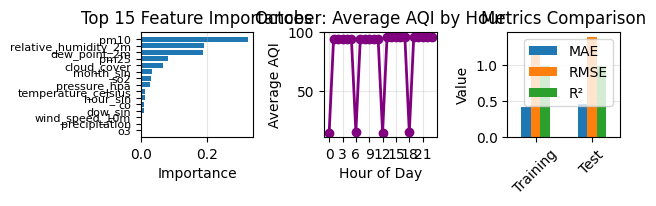

In [28]:
# Row 3: Feature Analysis
ax7 = plt.subplot(3, 3, 7)
feature_importance = pd.DataFrame({
    'feature': base_features,
    'importance': aqi_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)
ax7.barh(range(len(feature_importance)), feature_importance['importance'])
ax7.set_yticks(range(len(feature_importance)))
ax7.set_yticklabels(feature_importance['feature'], fontsize=8)
ax7.set_xlabel('Importance')
ax7.set_title('Top 15 Feature Importances')
ax7.invert_yaxis()
ax7.grid(True, alpha=0.3, axis='x')

ax8 = plt.subplot(3, 3, 8)
october_forecast['hour'] = october_forecast['datetime'].dt.hour
hourly_avg = october_forecast.groupby('hour')['predicted_aqi'].mean()
ax8.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=6, color='purple')
ax8.set_xlabel('Hour of Day')
ax8.set_ylabel('Average AQI')
ax8.set_title('October: Average AQI by Hour')
ax8.grid(True, alpha=0.3)
ax8.set_xticks(range(0, 24, 3))

ax9 = plt.subplot(3, 3, 9)
metrics_df = pd.DataFrame({
    'Training': [train_metrics['MAE'], train_metrics['RMSE'], train_metrics['R2']],
    'Test': [test_metrics['MAE'], test_metrics['RMSE'], test_metrics['R2']]
})
metrics_df.index = ['MAE', 'RMSE', 'R²']
metrics_df.T.plot(kind='bar', ax=ax9, rot=45)
ax9.set_title('Metrics Comparison')
ax9.set_ylabel('Value')
ax9.grid(True, alpha=0.3, axis='y')
ax9.legend()

plt.tight_layout()
plt.savefig('aqi_forecast_complete.png', dpi=300, bbox_inches='tight')
print("\nComplete visualization saved: 'aqi_forecast_complete.png'")
plt.show()



In [29]:
# SAVE MODEL

import joblib
joblib.dump(aqi_model, 'aqi_model_final.pkl')
print("\n" + "="*70)
print("Model saved: 'aqi_model_final.pkl'")
print("="*70)



Model saved: 'aqi_model_final.pkl'


In [30]:

# SUMMARY

print("\n" + "="*70)
print("AQI FORECASTING SUMMARY")
print("="*70)
print(f"\nData Period: {start_date} to {end_date}")
print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")

print(f"\nTest Set Performance:")
print(f"  R²:   {test_metrics['R2']:.4f}")
print(f"  MAE:  {test_metrics['MAE']:.4f}")
print(f"  RMSE: {test_metrics['RMSE']:.4f}")
print(f"  MAPE: {test_metrics['MAPE']:.2f}%")

print(f"\nOctober Forecast ({october_start.date()} to {october_end.date()}):")
print(f"  Mean AQI: {october_aqi_predictions.mean():.2f}")
print(f"  Std AQI:  {october_aqi_predictions.std():.2f}")
print(f"  Min AQI:  {october_aqi_predictions.min():.2f}")
print(f"  Max AQI:  {october_aqi_predictions.max():.2f}")

print("\nNote: October predictions use historical patterns from same hour/day-of-week")

print("\n" + "="*70)
print("COMPLETE!")
print("="*70)


AQI FORECASTING SUMMARY

Data Period: 2024-09-30 00:00:00 to 2025-09-30 00:00:00
Training samples: 1259600
Test samples: 113740

Test Set Performance:
  R²:   0.9934
  MAE:  0.4660
  RMSE: 1.3929
  MAPE: 3.14%

October Forecast (2025-09-30 to 2025-10-31):
  Mean AQI: 81.82
  Std AQI:  30.19
  Min AQI:  14.17
  Max AQI:  96.24

Note: October predictions use historical patterns from same hour/day-of-week

COMPLETE!
